TC4029.10: Ciencia de Datos
Actividad Semanal -- 4
Equipo 95

* Christian Emilio Saldaña Lopez    - A506509
* Fernando Anaya Delgado            - A01793832 



# Parte 1: Ejercicio guiado


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(url)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
reductionDF = df.copy()
myColumns = ["ID", "Amount", "Gender","Education", "MartialStatus", "Age", "RepaymentStatusSeptember", "RepaymentStatusAugust", "RepaymentStatusJuly",
"RepaymentStatusJune","RepaymentStatusMay","RepaymentStatusApril","AmountBillStmtSeptember", "AmountBillStmtAugust", "AmountBillStmtJuly", "AmountBillStmtJune",
                    "AmountBillStmtMay", "AmountBillStmtApril", "AmountPaidSeptember", "AmountPaidAugust", "AmountPaidJuly", "AmountPaidJune", "AmountPaidMay", "AmountPaidApril","Y"]
reductionDF.columns = myColumns
reductionDF.head()

,ID,Amount,Gender,Education,MartialStatus,Age,RepaymentStatusSeptember,RepaymentStatusAugust,RepaymentStatusJuly,RepaymentStatusJune,...,AmountBillStmtJune,AmountBillStmtMay,AmountBillStmtApril,AmountPaidSeptember,AmountPaidAugust,AmountPaidJuly,AmountPaidJune,AmountPaidMay,AmountPaidApril,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
reductionDF.dropna()
reductionDF.drop(columns=["ID", "Gender","Education","MartialStatus","RepaymentStatusSeptember", "RepaymentStatusAugust","RepaymentStatusJuly","RepaymentStatusJune","RepaymentStatusMay","RepaymentStatusApril" ,"Y"], inplace = True)
reductionDF.head()

,Amount,Age,AmountBillStmtSeptember,AmountBillStmtAugust,AmountBillStmtJuly,AmountBillStmtJune,AmountBillStmtMay,AmountBillStmtApril,AmountPaidSeptember,AmountPaidAugust,AmountPaidJuly,AmountPaidJune,AmountPaidMay,AmountPaidApril
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Normalizacion

In [ ]:
scaler = preprocessing.StandardScaler()
transformDF = pd.DataFrame(scaler.fit_transform(reductionDF), columns =reductionDF.columns)
transformDF.head()

,Amount,Age,AmountBillStmtSeptember,AmountBillStmtAugust,AmountBillStmtJuly,AmountBillStmtJune,AmountBillStmtMay,AmountBillStmtApril,AmountPaidSeptember,AmountPaidAugust,AmountPaidJuly,AmountPaidJune,AmountPaidMay,AmountPaidApril
0,-1.136720,-1.245864,-0.642603,-0.647476,-0.668059,-0.672563,-0.663134,-0.652803,-0.341885,-0.227111,-0.296773,-0.308087,-0.314144,-0.293402
1,-0.365981,-1.028894,-0.659319,-0.666820,-0.639324,-0.621711,-0.606317,-0.598051,-0.341885,-0.213615,-0.239981,-0.244264,-0.314144,-0.180907
2,-0.597202,-0.161015,-0.298705,-0.493996,-0.482504,-0.449839,-0.417315,-0.391740,-0.250240,-0.191917,-0.239981,-0.244264,-0.248701,-0.012164
3,-0.905498,0.164440,-0.057667,-0.013455,0.032665,-0.232524,-0.186905,-0.156717,-0.221140,-0.169394,-0.228623,-0.237882,-0.244185,-0.237154
4,-0.905498,2.334138,-0.578728,-0.611399,-0.161338,-0.347126,-0.348279,-0.331599,-0.221140,1.334785,0.271146,0.266315,-0.269054,-0.255210


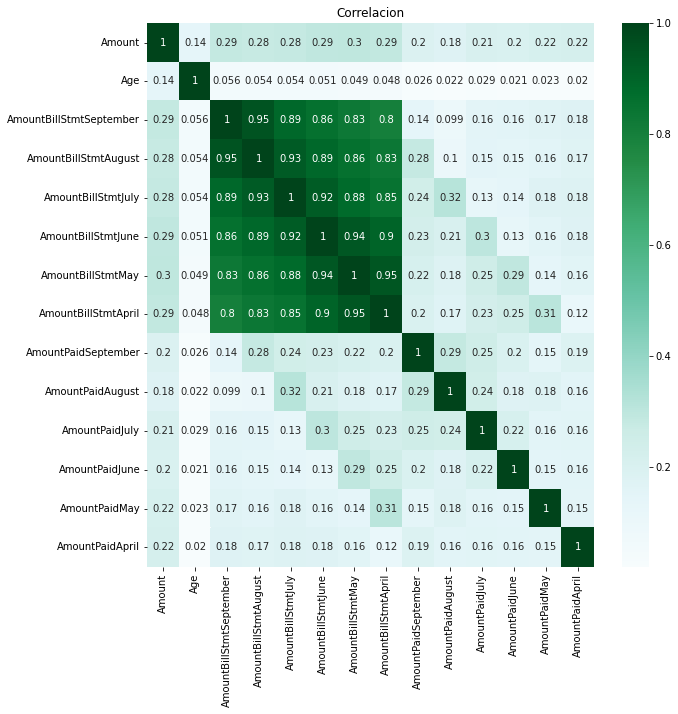

In [ ]:

corr = transformDF.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='BuGn')
plt.title("Correlacion")
plt.show()

PCA


In [ ]:
pcaDT = transformDF.copy()
pcs = PCA()
pcs.fit(pcaDT.iloc[:,:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
#pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.433364,0.422805,0.422805
1,1.310195,0.122574,0.545379
2,1.022007,0.074582,0.619961
3,0.961968,0.066077,0.686037
4,0.940351,0.063140,0.749177
5,0.934441,0.062349,0.811526
6,0.883217,0.055701,0.867227
7,0.852579,0.051903,0.919130
8,0.841003,0.050503,0.969634
9,0.514359,0.018891,0.988525


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


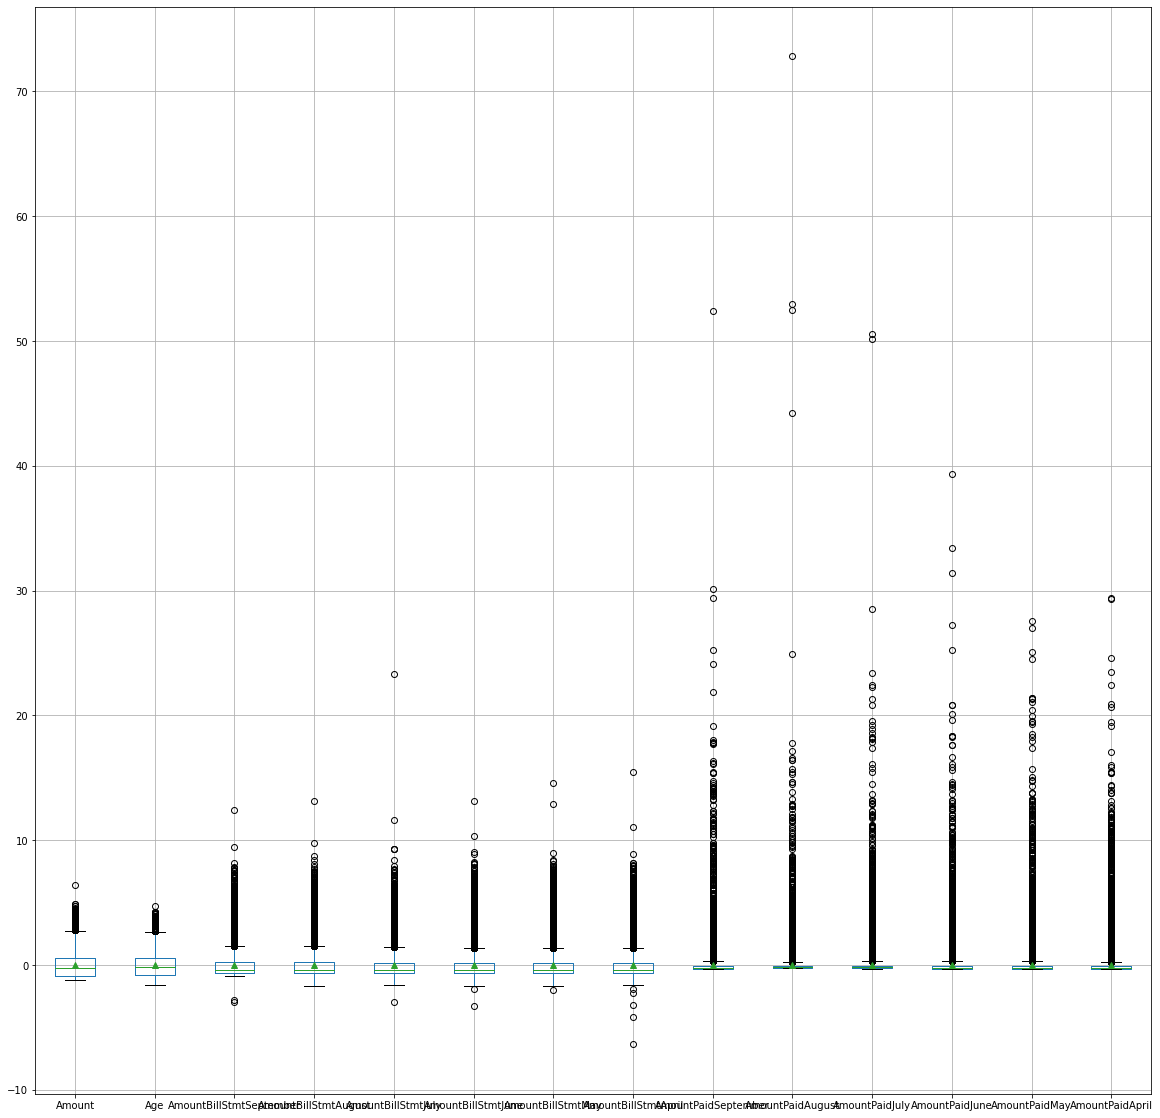

In [ ]:
#MNA_IAyAA_semana_3_RegLogistica_y_Regularizacion_L1_y_L2.ipynb
#plt.boxplot(resultados, labels=nombres, showmeans=True)
transformDF.boxplot(figsize=(20,20), showmeans=True)
plt.show()

# Parte 2


¿Cuál es el número de componentes mínimo y por qué?
Serian las primeras 5 variables porque se acompleta el 80% de los valores. Y 6 variables serian las deseadas porque da el 86%. 

¿Cuál es la variación de los datos que representan esos componentes?
Entrel el 80-86% de los valores. 

¿Cuál es la pérdida de información después de realizar PCA?
El 14%. 

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia 
en los componentes principales?
Las que tienen mayor serian: X1, X5, 	X12, X,13,X14 & X15.
Las que tienen menor serian: X6-X11, X16-17, X18-23.

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
Si que recomendariamos. Porque permite “condensar” la información aportada por múltiples variables en solo unas pocas componentes que representan el 80% del total.


